In [105]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
# Membaca Data dari Dataset
places = pd.read_csv('/content/drive/MyDrive/data/Data_Destination_Tourism_West_java.csv', encoding = 'ISO-8859-1')
ratings = pd.read_csv('/content/drive/MyDrive/data/tourism_rating.csv')

# Jumlah data
print('Jumlah tempat wisata: ', len(places.Place_Id.unique()))
print('Jumlah rating: ', len(ratings.Place_Ratings))

Jumlah tempat wisata:  523
Jumlah rating:  10300


In [108]:
# Konversi kolom 'Latitude' ke float64
places['Latitude'] = pd.to_numeric(places['Latitude'], errors='coerce')

# Konversi kolom 'Rating ke float64
places['Rating'] = pd.to_numeric(places['Rating'], errors = 'coerce')

# Periksa kembali informasi dataset
print(places.info())
print(ratings.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     523 non-null    int64  
 1   Place_Name   523 non-null    object 
 2   Description  523 non-null    object 
 3   Category     523 non-null    object 
 4   City         523 non-null    object 
 5   Price        523 non-null    int64  
 6   Rating       431 non-null    float64
 7   No.Telepon   523 non-null    object 
 8   Coordinate   523 non-null    object 
 9   Latitude     521 non-null    float64
 10  Longitude    523 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 45.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10300 non-null  int64
 1   Place_Id       10300 non-null  int64
 2   

In [109]:
places.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,No.Telepon,Coordinate,Latitude,Longitude
0,1,Jalan Braga,Jalan Braga adalah nama sebuah jalan utama di ...,Budaya,Bandung,0,4.7,(021) 2254 5456,"{'lat': -6.9150534, 'lng': 107.6089842}",-6.915053,107.608984
1,2,Gedung Sate,"Gedung Sate, dengan ciri khasnya berupa orname...",Budaya,Bandung,5000,4.6,087880333592,"{'lat': -6.9024812, 'lng': 107.61881}",-6.902481,107.618810
2,3,Trans Studio Bandung,Trans Studio Bandung adalah kawasan wisata ter...,Taman Hiburan,Bandung,280000,4.5,08118118244,"{'lat': -6.9250943, 'lng': 107.6364944}",-6.925094,107.636494
3,4,Taman Hutan Raya Ir. H. Djuanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,15000,4.5,(022) 2507891,"{'lat': -6.8565791, 'lng': 107.6323734}",-6.856579,107.632373
4,5,Farm House Susu Lembang,"Sebagai salah satu tempat wisata lembang baru,...",Taman Hiburan,Bandung,30000,4.4,082240207230,"{'lat': -6.832968999999999, 'lng': 107.6056183}",-6.832969,107.605618


In [110]:
places.describe()

,Place_Id,Price,Rating,Latitude,Longitude
count,523.000000,523.000000,431.000000,521.000000,523.000000
mean,262.000000,27930.919694,4.388167,-6.907158,107.752089
std,151.121364,41282.468603,0.208815,0.345075,0.537969
min,1.000000,0.000000,3.600000,-7.813054,106.473347
25%,131.500000,10132.500000,4.300000,-7.044695,107.443206
50%,262.000000,23306.000000,4.400000,-6.865522,107.637475
75%,392.500000,37429.500000,4.500000,-6.740064,108.291507
max,523.000000,600000.000000,4.900000,-6.039717,108.760517


In [111]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10300 non-null  int64
 1   Place_Id       10300 non-null  int64
 2   Place_Ratings  10300 non-null  int64
dtypes: int64(3)
memory usage: 241.5 KB


In [112]:
ratings.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [113]:
ratings.describe()

,User_Id,Place_Id,Place_Ratings
count,10300.000000,10300.000000,10300.000000
mean,156.075437,227.019320,3.079903
std,89.265122,131.964686,1.376330
min,1.000000,1.000000,1.000000
25%,79.000000,112.000000,2.000000
50%,156.000000,226.000000,3.000000
75%,232.000000,338.000000,4.000000
max,330.000000,523.000000,5.000000


In [114]:
places = places.drop(['Description', 'Price', 'Rating', 'No.Telepon', 'Coordinate', 'Latitude', 'Longitude'], axis = 1)

In [115]:
places.isnull().sum()

Place_Id      0
Place_Name    0
Category      0
City          0
dtype: int64

In [116]:
ratings.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [117]:
# Pengecekan data duplikan

print(f'Jumlah data destinasi wisata yang duplikat: {places.duplicated().sum()}')
print(f'Jumlah data rating pengguna wisata yang duplikat: {ratings.duplicated().sum()}')

Jumlah data destinasi wisata yang duplikat: 0
Jumlah data rating pengguna wisata yang duplikat: 83


In [118]:
# Menghapus data duplikat (Ratings)
ratings.drop_duplicates(inplace = True)

#### Modeling Sistem Rekomendasi dengan Collaborative Based FIltering

In [119]:
# Proces encoding fitur User_Id pada dataset ratings menjadi array

user_ids = ratings['User_Id'].unique().tolist()
print('list User_Id: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)



list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [120]:
# Proses encoding fitur Place_Id pada dataset rating menjadi array

place_ids = ratings['Place_Id'].unique().tolist()
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

In [121]:
# Mapping pemetaan kolom user dan place ke dataset rating yang berkaitan

ratings['user'] = ratings['User_Id'].map(user_to_user_encoded)
ratings['place'] = ratings['Place_Id'].map(place_to_place_encoded)

In [122]:
# Pengecekan jumlah user, jumlah destinasi, rating minimal, dan rating maksimal

users_count = len(user_to_user_encoded)
place_count = len(place_encoded_to_place)

ratings['rating'] = ratings['Place_Ratings'].values.astype(np.float32)

min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

print(f'Users Count: {users_count}')
print(f'Places Count: {place_count}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')

Users Count: 330
Places Count: 521
Min rating: 1.0
Max rating: 5.0


### Split Data rain dan Data Validation

In [123]:
# Mengacak dataset rating

ratings = ratings.sample(frac=1, random_state=42)
ratings

,User_Id,Place_Id,Place_Ratings,user,place,rating
2064,64,367,2,63,50,2.0
4855,146,7,2,145,435,2.0
5054,153,420,4,152,124,4.0
34,2,85,4,1,33,4.0
2950,91,23,1,90,32,1.0
...,...,...,...,...,...,...
5782,174,296,3,173,154,3.0
5237,159,69,4,158,406,4.0
5437,164,24,5,163,74,5.0
871,28,131,5,27,70,5.0


In [124]:
x = ratings[['user', 'place']].values
y = ratings['rating'].apply(lambda x: (
    x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)


[[ 63  50]
 [145 435]
 [152 124]
 ...
 [163  74]
 [ 27  70]
 [220  63]] [0.25 0.25 0.75 ... 1.   1.   0.5 ]


### Modeling Develop


In [125]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, users_count, place_count, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.users_count = users_count
    self.place_count = place_count
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        users_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.user_bias = layers.Embedding(users_count, 1)
    self.place_embedding = layers.Embedding(
        place_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.place_bias = layers.Embedding(place_count, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x)

In [126]:
model = RecommenderNet(users_count, place_count, 50)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


In [127]:
# Menambahkan Callback EarlyStopping jika tidak ada peningkatan selama 5 epochs

callbacks = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_root_mean_squared_error',
    min_delta = 1e-4,
    patience = 10,
    restore_best_weights = True
)

In [128]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 500,
    validation_data = (x_val, y_val),
    callbacks = [callbacks]
)

Epoch 1/500
1022/1022 [==============================] - 4s 3ms/step - loss: 0.6937 - root_mean_squared_error: 0.3439 - val_loss: 0.6946 - val_root_mean_squared_error: 0.3502
Epoch 2/500
1022/1022 [==============================] - 4s 4ms/step - loss: 0.6929 - root_mean_squared_error: 0.3433 - val_loss: 0.6945 - val_root_mean_squared_error: 0.3502
Epoch 3/500
1022/1022 [==============================] - 3s 3ms/step - loss: 0.6920 - root_mean_squared_error: 0.3427 - val_loss: 0.6944 - val_root_mean_squared_error: 0.3501
Epoch 4/500
1022/1022 [==============================] - 3s 2ms/step - loss: 0.6916 - root_mean_squared_error: 0.3424 - val_loss: 0.6942 - val_root_mean_squared_error: 0.3500
Epoch 5/500
1022/1022 [==============================] - 3s 2ms/step - loss: 0.6900 - root_mean_squared_error: 0.3412 - val_loss: 0.6941 - val_root_mean_squared_error: 0.3499
Epoch 6/500
1022/1022 [==============================] - 3s 3ms/step - loss: 0.6887 - root_mean_squared_error: 0.3403 - val_l

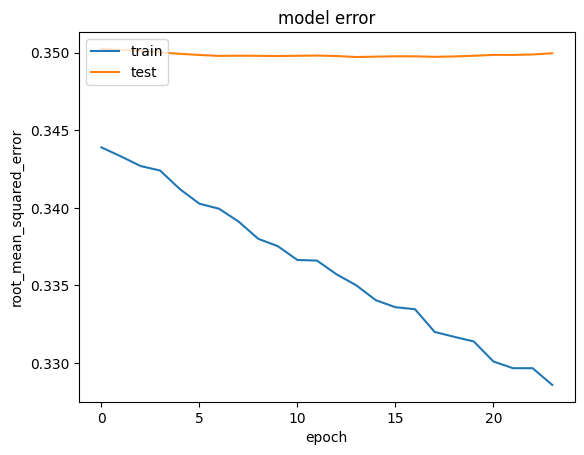

In [129]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


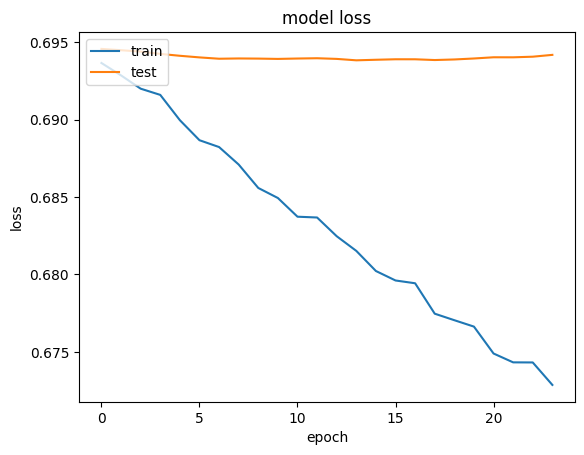

In [130]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Uji Sistem Rekomendasi

In [131]:
place_df = places
ratings_df = ratings

In [132]:
user_id = ratings_df.User_Id.sample(1).iloc[0]
place_rated = ratings_df[ratings_df.User_Id == user_id]

place_not_rated = place_df[~place_df['Place_Id'].isin(
    place_rated.Place_Id.values)]['Place_Id']
place_not_rated = list(
    set(place_not_rated).intersection(set(place_to_place_encoded.keys()))
)

place_not_rated = [
    [place_to_place_encoded.get(x)] for x in place_not_rated]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_rated), place_not_rated)
)

In [134]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-20:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_rated[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('=====' * 8)
print('Place with high ratings from user')
print('-----' * 8)

top_place_user = (
    place_rated.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(20)
    .Place_Id.values
)

place_df_rows = place_df[place_df['Place_Id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.Place_Name + ':', row.Category + ',', row.City)

print('-----' * 8)
print('Top 10 place recommendation')
print('-----' * 8)

recommended_place = place_df[place_df['Place_Id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.Place_Name + ':', row.Category + ',', row.City)


16/16 [==============================] - 0s 2ms/step
Showing recommendations for users: 194
Place with high ratings from user
----------------------------------------
Alun-Alun Kota Bandung: Taman Hiburan, Bandung
Caringin Tilu: Cagar Alam, Bandung
Masjid Agung Trans Studio Bandung: Tempat Ibadah, Bandung
Kebun Tanaman Obat Sari Alam: Cagar Alam, Bandung
Jendela Alam: Taman Hiburan, Bandung
Curug Jompong: Cagar Alam, Bandung
Kebun Durian Warso Farm: Taman Hiburan, Bogor
Kampung Adat Kuta: Budaya, Ciamis
Candi Cangkuang: Cagar Alam, Garut
Wana Wisata Puncak Sempur: Cagar Alam, Karawang
Taman Wisata Cibonteng: Taman Hiburan, Karawang
Goa Dayeuh, Karawang Selatan: Cagar Alam, Karawang
Wisata Kebon Jatidipala: Taman Hiburan, Karawang
Patilasan Prabu Siliwangi(Tapakan): Budaya, Majalengka
Lawang Saketeng: Cagar Alam, Majalengka
Bojongsalawe Beach: Cagar Alam, Pangandaran
Batu Karas Surf Spot: Cagar Alam, Pangandaran
Citumang Pangandaran: Cagar Alam, Pangandaran
Alun-Alun Kota Sukabumi: Tama